**<span style="color:darkblue; font-size:32px;">WEB SCRAPING DE LAPTOPS</span>**

### <p style="color:Darkred;">INTRODUCCIÓN</p>

##### <p style="color:Darkblack;">Mercado Libre es la mayor plataforma de comercio electrónico de la región, donde millones de compradores y vendedores se encuentran para realizar transacciones con una amplia gama de productos y servicios, a precio fijo. Esta, a diferencia de las páginas web de las tiendas por departamento, posee una amplia magnitud de modelos y precios muchas veces del mismo producto donde hasta el tiempo ya usado de este es un factor a la hora de venderlo./p>

### <p style="color:Darkred;">OBJETIVO</p>

#### <p style="color:Darkblack;">El trabajo comparará la página web de Mercado Libre Perú con la de otras tiendas por departamento reconocidas con el fin de analizar el precio y demás características de las laptops que estas ofrecen y lograr así una mejora en nuestra decisión de compra.</p>


<h2>Scrapeando en Mercado Libre</h2>


<img src="https://gestion.pe/resizer/gmHLeJjGlrxnIrUvIGCHZiGMZHw=/1200x800/smart/filters:format(jpeg):quality(75)/cloudfront-us-east-1.images.arcpublishing.com/elcomercio/WWMYGX624NEYFK57QLOMQFAPI4.jpg" width=500>

##### Buscaremos la información de todas las laptops que nos devuelve la página web.

In [1]:
#!pip install requests
from lxml import etree
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#https://listado.mercadolibre.com.pe/laptops
import requests
r=requests.get("https://listado.mercadolibre.com.pe/laptops#menu=categories")

In [5]:
r.status_code

200

In [4]:
soup=BeautifulSoup(r.content,"html.parser") #parseamos el contenido HTML

### Extracción de las características de las laptops en la primera página de los resultados arrojados por el buscador de ML.

In [12]:

titulos=soup.find_all("h2",attrs={"class":"ui-search-item__title shops__item-title"})
titulos = [i.text for i in titulos]
titulos
len(titulos)

52

In [9]:
#estrayendo las urls de las laptops
urls=soup.find_all("a",attrs={"class":"ui-search-item__group__element shops__items-group-details ui-search-link"})
#urls
#urls[0].get("href")
urls=[i.get("href") for i in urls]
print(urls)
len(urls)

52

In [13]:
#codigo para extraer los precios de las laptops
dom=etree.HTML(str(soup))
precios = dom.xpath('//li[@class="ui-search-layout__item shops__layout-item"]//div[@class="ui-search-result__content-columns shops__content-columns"]//div[@class="ui-search-result__content-column ui-search-result__content-column--left shops__content-columns-left"]//div[@class="ui-search-item__group ui-search-item__group--price shops__items-group"]//div[@class="ui-search-price ui-search-price--size-medium shops__price"]//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount ui-search-price__part shops__price-part andes-money-amount--cents-superscript"]//span[@class="andes-money-amount__fraction"]')
#precios[0].text
len(precios)
precios = [i.text for i in precios]
len(precios)
#precios

52

## Colocar toda la información obtenida en un DataFrame

In [15]:
df = pd.DataFrame({"titulos":titulos,"urls":urls,"precios":precios})
df

,titulos,urls,precios
0,"Laptop HP 15-ef2511la azul índigo 15.6"", AMD R...",https://www.mercadolibre.com.pe/laptop-hp-15-e...,1.889
1,"Apple Macbook Air 13,6 Chip M2 256gb",https://www.mercadolibre.com.pe/apple-macbook-...,5.339
2,"Apple Macbook Air (13 pulgadas, 2020, Chip M1,...",https://www.mercadolibre.com.pe/apple-macbook-...,4.149
3,Laptop Asus Tuf Core I7 12650h 16gb Ddr5 1tb ...,https://www.mercadolibre.com.pe/laptop-asus-tu...,5.899
4,"Laptop HP 245 G8 plateado ceniza oscuro 14"", A...",https://www.mercadolibre.com.pe/laptop-hp-245-...,2.035
5,"MacBook Air M2 2022 midnight 13.6"", Apple M2 ...",https://www.mercadolibre.com.pe/macbook-air-m2...,5.339
6,Laptop Lenovo IdeaPad 15ITL05 platinum grey 1...,https://www.mercadolibre.com.pe/laptop-lenovo-...,2.383
7,Macbook Pro 14 M2 Pro Apple 2023 16gb 512gb Ss...,https://articulo.mercadolibre.com.pe/MPE-62962...,8.549
8,"Macbook Pro 13'' Apple M2 (8 Gb Ram, 256 Gb Ssd)",https://click1.mercadolibre.com.pe/mclics/clic...,6.899
9,Laptop Hp 14-dq2510la Intel Ci3 8gb 512 Ssd Wi...,https://click1.mercadolibre.com.pe/mclics/clic...,1.499


### Ahora obtendremos los resultados de las laptops en venta de cada pestaña de ML

In [16]:
#para ver las paginas siguientes
siguiente = dom.xpath('//div[@class="ui-search-pagination shops__pagination-content"]//ul[@class="ui-search-pagination andes-pagination shops__pagination"]//li[contains(@class,"--next")]/a')[0].get("href")

In [17]:
#ver el inicio de pagina es decir la pagina 1
pagina1 = soup.find("span",attrs={"class":"andes-pagination__link"}).text
pagina1=int(pagina1)
pagina1

1

In [18]:
#ahora sacar el 40 pagina
final = soup.find("li",attrs= {"class":"andes-pagination__page-count"})
int(final.text.split(" ")[1])# convierte a entero lo que esta en caracter y ademas hace un espacio 

40

In [19]:
#se crea listas vacias que se iran agregadando elementos del siguente codigo
lista_titulos = []
lista_urls = []
lista_precios = []

In [20]:
#esta línea de codigo hace que se recorran las 40 páginas de de la pagina de mercado libre para encontrar laptops
siguiente = "https://listado.mercadolibre.com.pe/laptops#menu=categories"
while True:
    r = requests.get(siguiente)
    if r.status_code == 200:
        soup = BeautifulSoup(r.content, "html.parser")

        # titulos
        titulos = soup.find_all("h2", attrs={"class": "ui-search-item__title shops__item-title"})
        titulos = [i.text for i in titulos]
        lista_titulos.extend(titulos)

        # urls
        urls = soup.find_all("a", attrs={"class": "ui-search-item__group__element shops__items-group-details ui-search-link"})
        urls = [i.get("href") for i in urls]
        lista_urls.extend(urls)

        # precios
        dom = etree.HTML(str(soup))
        precios = dom.xpath('//li[@class="ui-search-layout__item shops__layout-item"]//div[@class="ui-search-result__content-columns shops__content-columns"]//div[@class="ui-search-result__content-column ui-search-result__content-column--left shops__content-columns-left"]//div[@class="ui-search-item__group ui-search-item__group--price shops__items-group"]//div[@class="ui-search-price ui-search-price--size-medium shops__price"]//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount ui-search-price__part shops__price-part andes-money-amount--cents-superscript"]//span[@class="andes-money-amount__fraction"]')
        precios = [i.text for i in precios]
        lista_precios.extend(precios)

        # validando la pagina 1 y la ultima
        pagina1 = soup.find("span", attrs={"class": "andes-pagination__link"}).text
        pagina1 = int(pagina1)

        final = soup.find("li", attrs={"class": "andes-pagination__page-count"})
        if final is not None:
            final = int(final.text.split(" ")[1])
        else:
            break
        print(pagina1,final)
        if pagina1==final:
            break
        siguiente = dom.xpath('//div[@class="ui-search-pagination shops__pagination-content"]//ul[@class="ui-search-pagination andes-pagination shops__pagination"]//li[contains(@class,"--next")]/a')[0].get("href")

1 40
2 40
3 40
4 40
5 40
6 40
7 40
8 40
9 40
10 40
11 40
12 40
13 40
14 40
15 40
16 40
17 40
18 40
19 40
20 40
21 40
22 40
23 40
24 40
25 40
26 40
27 40
28 40
29 40
30 40
31 40
32 40
33 40
34 40
35 40
36 40
37 40
38 40
39 40
40 40


In [21]:
print(len(lista_titulos))
print(len(lista_urls))
print(len(lista_precios))

2026
2026
2016


In [22]:
#codigo para agregar valores nulos a los que no tengan valores para tenr iguales longitudes de filas
import pandas as pd
import numpy as np

# Verificar longitudes de las listas
length_titulos = len(lista_titulos)
length_urls = len(lista_urls)
length_precios = len(lista_precios)

# Obtener la longitud máxima de las listas
max_length = max(length_titulos, length_urls, length_precios)

# Rellenar las listas con valores nulos si es necesario
if length_titulos < max_length:
    lista_titulos.extend([np.nan] * (max_length - length_titulos))
if length_urls < max_length:
    lista_urls.extend([np.nan] * (max_length - length_urls))
if length_precios < max_length:
    lista_precios.extend([np.nan] * (max_length - length_precios))

# Crear el DataFrame con las listas
data = pd.DataFrame({'titulo': lista_titulos, 'url': lista_urls, 'precio': lista_precios})

# Verificar las longitudes nuevamente
print(len(data['titulo']))
print(len(data['url']))
print(len(data['precio']))

2026
2026
2026


In [23]:
#líneas de codigos para extraer las marcas de las laptops
import re

lista_marcas = []

# Patrones de marcas conocidas
patrones_marcas = ["hp", "lenovo", "apple", "dell", "asus"]  # Agrega aquí las marcas que deseas buscar

for titulo in lista_titulos:
    # Buscar coincidencias con los patrones de marcas
    matches = re.findall(r'\b(?:' + '|'.join(patrones_marcas) + r')\b', titulo.lower())

    if matches:
        marca_encontrada = matches[0]
        lista_marcas.append(marca_encontrada)
    else:
        lista_marcas.append("NA")

print(lista_marcas)

['hp', 'apple', 'apple', 'asus', 'hp', 'apple', 'lenovo', 'apple', 'apple', 'hp', 'apple', 'hp', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'NA', 'asus', 'lenovo', 'lenovo', 'dell', 'apple', 'lenovo', 'asus', 'lenovo', 'asus', 'hp', 'asus', 'asus', 'asus', 'lenovo', 'asus', 'hp', 'lenovo', 'asus', 'dell', 'NA', 'NA', 'NA', 'hp', 'asus', 'lenovo', 'asus', 'NA', 'asus', 'lenovo', 'NA', 'asus', 'NA', 'lenovo', 'apple', 'hp', 'hp', 'lenovo', 'apple', 'NA', 'NA', 'hp', 'lenovo', 'asus', 'dell', 'lenovo', 'apple', 'asus', 'lenovo', 'NA', 'asus', 'lenovo', 'asus', 'lenovo', 'asus', 'apple', 'dell', 'lenovo', 'asus', 'NA', 'asus', 'apple', 'NA', 'asus', 'NA', 'lenovo', 'asus', 'hp', 'NA', 'lenovo', 'hp', 'lenovo', 'NA', 'lenovo', 'lenovo', 'dell', 'asus', 'hp', 'dell', 'asus', 'asus', 'asus', 'lenovo', 'hp', 'hp', 'lenovo', 'apple', 'hp', 'apple', 'lenovo', 'hp', 'hp', 'dell', 'NA', 'asus', 'asus', 'asus', 'NA', 'asus', 'apple', 'apple', 'asus', 'lenovo', 'NA', 'NA', 'asus', 'lenovo

In [24]:
data

,titulo,url,precio
0,"Laptop HP 15-ef2511la azul índigo 15.6"", AMD R...",https://www.mercadolibre.com.pe/laptop-hp-15-e...,1.889
1,"Apple Macbook Air 13,6 Chip M2 256gb",https://www.mercadolibre.com.pe/apple-macbook-...,5.339
2,"Apple Macbook Air (13 pulgadas, 2020, Chip M1,...",https://www.mercadolibre.com.pe/apple-macbook-...,4.149
3,Laptop Asus Tuf Core I7 12650h 16gb Ddr5 1tb ...,https://www.mercadolibre.com.pe/laptop-asus-tu...,5.899
4,"Laptop HP 245 G8 plateado ceniza oscuro 14"", A...",https://www.mercadolibre.com.pe/laptop-hp-245-...,2.035
...,...,...,...
2021,Laptop Hp 250 G8 15.6' I7 11va 8gb 512ssd Fre...,https://articulo.mercadolibre.com.pe/MPE-62770...,NaN
2022,Msi Katana Gf76 17.3'' Ci7-12700h 16gb 1tb Ssd...,https://articulo.mercadolibre.com.pe/MPE-62836...,NaN
2023,Notebook Asus B1500ceae-ej2618x 15.6 Fhd Led,https://articulo.mercadolibre.com.pe/MPE-62882...,NaN
2024,"Notebook Hp Probook 450 G9 15.6 Fhd Ips, Core...",https://articulo.mercadolibre.com.pe/MPE-62987...,NaN


In [ ]:
### Retoques

In [ ]:
# codigo para saber si hay datos repetidos en la data
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con tus datos
duplicados = data.duplicated()

# Puedes imprimir las filas duplicadas
print(data[duplicados])

# También puedes contar la cantidad de filas duplicadas
cantidad_duplicados = sum(duplicados)
print("Cantidad de filas duplicadas:", cantidad_duplicados)

## imput para ingresar el precio minimo y máximo de las laptop

In [27]:
# Convertir la columna 'precio' a tipo de dato 'float'
data['precio'] = data['precio'].astype(float)

# Ingresar el rango de precios
precio_min = float(input("Ingrese el precio mínimo: "))
precio_max = float(input("Ingrese el precio máximo: "))

# Filtrar las laptops dentro del rango de precios
laptops_filtradas = data[(data['precio'] >= precio_min) & (data['precio'] <= precio_max)]

# Imprimir las laptops que cumplen con el rango de precios
if laptops_filtradas.empty:
    print("No se encontraron laptops dentro del rango de precios especificado.")
else:
    print("Laptops disponibles dentro del rango de precios:")
    for index, laptop in laptops_filtradas.iterrows():
        print(f"Título: {laptop['titulo']}")
        print(f"URL: {laptop['url']}")
        print(f"Precio: {laptop['precio']}")
        print("-----------------------------")

Ingrese el precio mínimo: 800
Ingrese el precio máximo: 1600
Laptops disponibles dentro del rango de precios:
Título: Laptop Empresarial Hp Elitebook 840 G3 - Ci5 - 8gb - Ssd
URL: https://articulo.mercadolibre.com.pe/MPE-439323098-laptop-empresarial-hp-elitebook-840-g3-ci5-8gb-ssd-_JM#position=36&search_layout=stack&type=item&tracking_id=8c1b58c5-2541-4f74-9d97-5c0d45a91f2e
Precio: 993.0
-----------------------------
Título:  Laptop Refurbished Empresarial Dell Ci7 4gb Ssd 13.3/14''
URL: https://articulo.mercadolibre.com.pe/MPE-430794220-laptop-refurbished-empresarial-dell-ci7-4gb-ssd-13314-_JM#position=46&search_layout=stack&type=item&tracking_id=1e283a8d-105c-4853-8c5c-f306088d68dc
Precio: 992.0
-----------------------------
Título: Laptop Empresarial Dell 6430 Corei5 4gb Solido Ssd 240gb 
URL: https://articulo.mercadolibre.com.pe/MPE-444739405-laptop-empresarial-dell-6430-corei5-4gb-solido-ssd-240gb-_JM#position=50&search_layout=stack&type=item&tracking_id=1e283a8d-105c-4853-8c5c-f3

## <p style="color:Darkred;">Imput para ingresar las marcas que el usuario desea averiguar</p>

In [ ]:
# Solicitar al usuario ingresar las marcas deseadas
marcas_deseadas = input("Ingresa las marcas separadas por comas: ").lower().split(",")

# Filtrar el DataFrame por las marcas deseadas
laptops_filtradas = data[data['marca'].str.lower().isin(marcas_deseadas)]

# Crear un nuevo DataFrame con las laptops filtradas
df_filtrado = pd.DataFrame(laptops_filtradas, columns=['titulo', 'url', 'precio', 'marca'])

# Imprimir el DataFrame filtrado en formato de tabla
print(df_filtrado.to_string(index=False))

<h1 align="center" style="color:#8B0000;font-size:32px;">LAPTOPS GAMER</h1>

**Nuestro objetivo  es realizar web scraping a páginas web de venta de laptops gamer y laptops (mercado libre) para obtener precios, marcas, descripciones y enlaces. Esto permitirá comparar los precios de laptops gamer con los de laptops  y analizar las diferencias.**


**<span style="color:darkblue; font-size:32px;">WEBS A UTILIZAR</span>**

**<span style="color:darkgreen; font-size:24px; text-transform:uppercase;">RIPLEY</span>**


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
verificar=requests.get("https://simple.ripley.com.pe/tecnologia/computacion-gamer/ver-todo?facet=Tipo%20de%20Producto%3ALaptops&s=mdco")
print(verificar)

<Response [200]>


In [3]:
# URL de la página web a hacer scraping
url = 'https://simple.ripley.com.pe/tecnologia/computacion-gamer/ver-todo?facet=Tipo%20de%20Producto%3ALaptops&s=mdco'

# Realizar la solicitud HTTP GET a la página
response = requests.get(url)

# Crear el objeto BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
precios=soup.find_all("li", class_=["catalog-prices__offer-price"])

precios

[<li class="catalog-prices__offer-price" title="Precio Internet">S/ 2,599</li>,
 <li class="catalog-prices__offer-price" title="Precio Internet">S/ 2,999</li>,
 <li class="catalog-prices__offer-price" title="Precio Internet">S/ 3,399</li>,
 <li class="catalog-prices__offer-price catalog-prices__highest" title="Precio Internet">S/ 4,399</li>,
 <li class="catalog-prices__offer-price" title="Precio Internet">S/ 3,399</li>,
 <li class="catalog-prices__offer-price catalog-prices__highest" title="Precio Internet">S/ 2,899</li>,
 <li class="catalog-prices__offer-price catalog-prices__highest" title="Precio Internet">S/ 4,099</li>,
 <li class="catalog-prices__offer-price catalog-prices__highest" title="Precio Internet">S/ 3,399</li>,
 <li class="catalog-prices__offer-price" title="Precio Internet">S/ 5,399</li>,
 <li class="catalog-prices__offer-price catalog-prices__highest" title="Precio Internet">S/ 7,699</li>,
 <li class="catalog-prices__offer-price catalog-prices__highest" title="Precio I

In [4]:
pre= list()

for i in precios: 
    pre.append(i.text)
print(pre)
len(pre)

['S/ 2,599', 'S/ 2,999', 'S/ 3,399', 'S/ 4,399', 'S/ 3,399', 'S/ 2,899', 'S/ 4,099', 'S/ 3,399', 'S/ 5,399', 'S/ 7,699', 'S/ 6,199', 'S/ 4,099', 'S/ 6,999.99']


13

In [7]:
nombre= list()

for i in nombres: 
    nombre.append(i.text)
print(nombre)

["LAPTOP ACER NITRO 5 INTEL CORE I5 8GB RAM 512GB SSD 15.6''\xa0FHD IPS 144HZ\xa0GTX 1650\xa04GB", "LAPTOP ACER NITRO 5 INTEL CORE I5 8GB RAM 512GB SSD 15.6''\xa0FHD IPS 144HZ\xa0RTX 3050 4GB", "LAPTOP LENOVO IDEAPAD GAMING 3 AMD RYZEN 5 16GB RAM 512GB SSD 15.6''", "LAPTOP GAMER\xa0ASUS\xa0TUF DASH F15 F517ZC-HN005W I5 12VA 8GB RAM 512GB SSD 15.6''", "LAPTOP GAMER ASUS TUF DASH F15 FX517ZC-HN005W INTEL CORE I5 12450H 8GB RAM 512GB SSD 15.6''", "LAPTOP GAMER ASUS TUF F15 FX506LHB-HN323UW INTEL CORE I5 10300H 8GB RAM 512GB SSD 15.6''", 'LAPTOP ACER NITRO 5 CORE I5 12500H 8GB 512GB SSD 15,6" FHD IPS 144HZ RTX3050 4GB W11', "LAPTOP LENOVO IDEAPAD GAMING 3 AMD RYZEN 5 8GB RAM 1TB HDD + 256GB SSD 15.6''", 'LAPTOP ASUS TUF DASH F15 FX517ZM-HN001W INTEL CORE I7 12VA GEN 16GB RAM 512GB SSD 15.6"', "LAPTOP GAMER ROG STRIX G15 G513RM-HQ081W AMD RYZEN 9 6900HX 16GB RAM 1TB SSD RTX3060 15.6''", 'LAPTOP ASUS ROG STRIX G15 G513RC-HN097W AMD RYZEN 7 16GB RAM 512GB SSD 15.6"', 'LAPTOP ACER NITRO 5 INTE

In [8]:
nombres=soup.find_all("div", {"class":"catalog-product-details__name"})#obteniendo los datos del precio del producto.
nombres
len(nombres)

13

In [9]:
marca=soup.find_all("div", {"class":"brand-logo"})#obteniendo los datos del precio del producto.
marca
#len(marca)

[<div class="brand-logo"><span>ACER</span></div>,
 <div class="brand-logo"><span>ACER</span></div>,
 <div class="brand-logo"><span>LENOVO</span></div>,
 <div class="brand-logo"><span>ASUS</span></div>,
 <div class="brand-logo"><span>ASUS</span></div>,
 <div class="brand-logo"><span>ASUS</span></div>,
 <div class="brand-logo"><span>ACER</span></div>,
 <div class="brand-logo"><span>LENOVO</span></div>,
 <div class="brand-logo"><span>ASUS</span></div>,
 <div class="brand-logo"><span>ASUS</span></div>,
 <div class="brand-logo"><span>ASUS</span></div>,
 <div class="brand-logo"><span>ACER</span></div>,
 <div class="brand-logo"><span>ASUS</span></div>]

In [10]:
marcas= list()

for i in marca: 
    marcas.append(i.text)
print(marcas)

['ACER', 'ACER', 'LENOVO', 'ASUS', 'ASUS', 'ASUS', 'ACER', 'LENOVO', 'ASUS', 'ASUS', 'ASUS', 'ACER', 'ASUS']


In [11]:
tienda=["ripley","ripley","ripley","ripley","ripley","ripley","ripley","ripley","ripley","ripley","ripley","ripley","ripley"]

In [12]:
enlaces = []

# Buscar todos los elementos 'a' que contengan la clase 'catalog-product-item'
productos = soup.find_all('a', class_='catalog-product-item')

# Iterar sobre los elementos encontrados y obtener el enlace
for producto in productos:
    enlace = producto['href']
    enlaces.append(enlace)

# Imprimir los enlaces obtenidos
print(enlaces)
len(enlaces)

['/laptop-acer-nitro-5-intel-core-i5-8gb-ram-512gb-ssd-156-fhd-ips-144hz-gtx-1650-4gb-2004292267064p', '/laptop-acer-nitro-5-intel-core-i5-8gb-ram-512gb-ssd-156-fhd-ips-144hz-rtx-3050-4gb-2004292268368p', '/laptop-lenovo-ideapad-gaming-3-amd-ryzen-5-16gb-ram-512gb-ssd-156-2004297243520p', '/laptop-gamer-asus-tuf-dash-f15-f517zc-hn005w-i5-12va-8gb-ram-512gb-ssd-156-2004301335791p', '/laptop-gamer-asus-tuf-dash-f15-fx517zc-hn005w-intel-core-i5-12450h-8gb-ram-512gb-ssd-156-2004295930392p', '/laptop-gamer-asus-tuf-f15-fx506lhb-hn323uw-intel-core-i5-10300h-8gb-ram-512gb-ssd-156-2004295827302p', '/laptop-acer-nitro-5-core-i5-12500h-8gb-512gb-ssd-156-fhd-ips-144hz-rtx3050-4gb-w11-2004303147859p', '/laptop-lenovo-ideapad-gaming-3-amd-ryzen-5-8gb-ram-1tb-hdd-256gb-ssd-156-2004295930378p', '/laptop-asus-tuf-dash-f15-fx517zm-hn001w-intel-core-i7-12va-gen-16gb-ram-512gb-ssd-156-2004300945274p', '/laptop-gamer-rog-strix-g15-g513rm-hq081w-amd-ryzen-9-6900hx-16gb-ram-1tb-ssd-rtx3060-156-2004296229914

13

In [13]:
data = {"MARCA":marca,"PRECIOS":pre,"PRODUCTO":nombre,"ENLACE":enlaces,"TIENDA":tienda}
       
     
        
df = pd.DataFrame(data, columns = ["MARCA","PRODUCTO","PRECIOS","ENLACE","TIENDA"])

df

,MARCA,PRODUCTO,PRECIOS,ENLACE,TIENDA
0,[[ACER]],LAPTOP ACER NITRO 5 INTEL CORE I5 8GB RAM 512G...,"S/ 2,599",/laptop-acer-nitro-5-intel-core-i5-8gb-ram-512...,ripley
1,[[ACER]],LAPTOP ACER NITRO 5 INTEL CORE I5 8GB RAM 512G...,"S/ 2,999",/laptop-acer-nitro-5-intel-core-i5-8gb-ram-512...,ripley
2,[[LENOVO]],LAPTOP LENOVO IDEAPAD GAMING 3 AMD RYZEN 5 16G...,"S/ 3,399",/laptop-lenovo-ideapad-gaming-3-amd-ryzen-5-16...,ripley
3,[[ASUS]],LAPTOP GAMER ASUS TUF DASH F15 F517ZC-HN005W I...,"S/ 4,399",/laptop-gamer-asus-tuf-dash-f15-f517zc-hn005w-...,ripley
4,[[ASUS]],LAPTOP GAMER ASUS TUF DASH F15 FX517ZC-HN005W ...,"S/ 3,399",/laptop-gamer-asus-tuf-dash-f15-fx517zc-hn005w...,ripley
5,[[ASUS]],LAPTOP GAMER ASUS TUF F15 FX506LHB-HN323UW INT...,"S/ 2,899",/laptop-gamer-asus-tuf-f15-fx506lhb-hn323uw-in...,ripley
6,[[ACER]],LAPTOP ACER NITRO 5 CORE I5 12500H 8GB 512GB S...,"S/ 4,099",/laptop-acer-nitro-5-core-i5-12500h-8gb-512gb-...,ripley
7,[[LENOVO]],LAPTOP LENOVO IDEAPAD GAMING 3 AMD RYZEN 5 8GB...,"S/ 3,399",/laptop-lenovo-ideapad-gaming-3-amd-ryzen-5-8g...,ripley
8,[[ASUS]],LAPTOP ASUS TUF DASH F15 FX517ZM-HN001W INTEL ...,"S/ 5,399",/laptop-asus-tuf-dash-f15-fx517zm-hn001w-intel...,ripley
9,[[ASUS]],LAPTOP GAMER ROG STRIX G15 G513RM-HQ081W AMD R...,"S/ 7,699",/laptop-gamer-rog-strix-g15-g513rm-hq081w-amd-...,ripley


**<span style="color:darkgreen; font-size:24px; text-transform:uppercase;">YAMOSHI</span>**

In [85]:
r1=requests.get('https://yamoshi.com.pe/59-laptops-gamers')
r1.status_code
soup1=BeautifulSoup(r1.content,'html.parser')
precio=soup1.find_all("span",attrs={"class":"price text-price-contrary-money font-weight-bold text-15px"})
precio

[<span class="price text-price-contrary-money font-weight-bold text-15px">S/ 6,152.96</span>,
 <span class="price text-price-contrary-money font-weight-bold text-15px">S/ 7,488.80</span>,
 <span class="price text-price-contrary-money font-weight-bold text-15px">S/ 5,704.00</span>,
 <span class="price text-price-contrary-money font-weight-bold text-15px">S/ 3,238.40</span>,
 <span class="price text-price-contrary-money font-weight-bold text-15px">S/ 5,829.12</span>,
 <span class="price text-price-contrary-money font-weight-bold text-15px">S/ 4,655.20</span>,
 <span class="price text-price-contrary-money font-weight-bold text-15px">S/ 5,910.08</span>,
 <span class="price text-price-contrary-money font-weight-bold text-15px">S/ 7,084.00</span>,
 <span class="price text-price-contrary-money font-weight-bold text-15px">S/ 5,383.84</span>,
 <span class="price text-price-contrary-money font-weight-bold text-15px">S/ 5,383.84</span>,
 <span class="price text-price-contrary-money font-weight-bo

In [86]:
import re

precio1 = []
for i in precio:
    precio_text = i.text.strip()
    precio_num = re.sub(r'\D', '', precio_text)  # Eliminar caracteres no numéricos
    precio_final = "S/ " + precio_num  # Agregar el símbolo "S/" al precio numérico
    precio1.append(precio_final)

print(precio1)

['S/ 615296', 'S/ 748880', 'S/ 570400', 'S/ 323840', 'S/ 582912', 'S/ 465520', 'S/ 591008', 'S/ 708400', 'S/ 538384', 'S/ 538384', 'S/ 558624', 'S/ 582912', 'S/ 647680', 'S/ 659824', 'S/ 667920', 'S/ 704352', 'S/ 772800', 'S/ 728640', 'S/ 619344']


In [87]:
precio_2=['S/ 6,152.96','S/ 7,488.80','S/ 5,704.00','S/ 3,238.40', 'S/ 5,829.12', 'S/ 4,655.20', 'S/ 5,910.08', 'S/ 7,084.00', 'S/ 5,383.84', 'S/ 5,383.84', 'S /5,586.24', 'S/ 5,829.12','S/ 6,476.80', 'S/ 6,598.24', 'S/ 6,679.20', 'S/ 7,043.52', 'S/ 7,728.00', 'S/ 7,286.40', 'S/ 6,193.44']

In [88]:
marcas=soup1.find_all("span",attrs={"text text-gray-light fz-11 prod-brand text-left"})
lista_marcas = [marca.text.strip() for marca in marcas]

# Imprimir las marcas
for marca in lista_marcas:
    print(marca)

In [89]:
titulos=soup1.find_all("a",attrs={"class":"product-name --font-weight-bold-600"})
titulos

[<a class="product-name --font-weight-bold-600" href="https://yamoshi.com.pe/inicio/10390-laptop-i7-gaming-asus-tuf-dash-fx517zr-12650h-16gb-512gb-ssd-rtx-3070-8gb-156-w11.html">LAPTOP I7 GAMING ASUS TUF DASH FX517ZR 12650H 16GB 512GB SSD RTX 3070 8GB...</a>,
 <a class="product-name --font-weight-bold-600" href="https://yamoshi.com.pe/inicio/10391-laptop-i7-gaming-asus-rog-strix-g614jv-as73-13650hx-16gb-512gb-ssd-rtx-4060-8gb-16-w11.html">LAPTOP I7 GAMING ASUS ROG STRIX G614JV-AS73 13650HX 16GB 512GB SSD RTX 4060...</a>,
 <a class="product-name --font-weight-bold-600" href="https://yamoshi.com.pe/inicio/10392-laptop-ryzen-7-gaming-asus-tuf-fa507rm-es73-6800h-16gb-512gb-ssd-rtx-3060-6gb-156-w11.html">LAPTOP RYZEN 7 GAMING ASUS TUF FA507RM-ES73 6800H 16GB 512GB SSD RTX 3060...</a>,
 <a class="product-name --font-weight-bold-600" href="https://yamoshi.com.pe/inicio/10384-laptop-i5-hp-victus-15-fa0031-12450h-8gb-512gb-ssd-gtx-1650-4gb-156-w11h.html">LAPTOP I5 HP VICTUS ( 15-FA0031 ) 12450H

In [90]:
titulo= list()

for i in titulos: 
    titulo.append(i.text)
print(titulo)
len (titulo)

['LAPTOP I7 GAMING ASUS TUF DASH FX517ZR 12650H 16GB 512GB SSD RTX 3070 8GB...', 'LAPTOP I7 GAMING ASUS ROG STRIX G614JV-AS73 13650HX 16GB 512GB SSD RTX 4060...', 'LAPTOP RYZEN 7 GAMING ASUS TUF FA507RM-ES73 6800H 16GB 512GB SSD RTX 3060...', 'LAPTOP I5 HP VICTUS ( 15-FA0031 ) 12450H 8GB 512GB SSD GTX 1650 4GB 15.6" W11H', 'LAPTOP RYZEN 7 GAMING HP OMEN 16-N0023 6800H 16GB 512GB SSD RTX 3060 6GB...', 'LAPTOP I7 HP VICTUS 15-FA0032DX ( 68Y11UA ) 12650H 16GB 512GB SSD RTX 3050...', 'LAPTOP I7 GAMING LENOVO LEGION 5 15IAH7H 12700H 16GB 512GB SSD RTX 3060 6GB...', 'LAPTOP I7 GAMING GIGABYTE AERO 16 XE5-73US948HP 12700H 32GB 2TB SSD RTX...', 'LAPTOP I7 GAMING MSI THIN GF63 12650H 16GB 512GB SSD RTX 4050 6GB 15.6" W11', 'LAPTOP I7 GAMING MSI CROSSHAIR 15 A11UEK-205 11800H 16GB 512 SSD RTX 3060...', 'LAPTOP I7 GAMING MSI KATANA GF66 12UE-603 12700H 16GB 512GB SSD RTX 3060...', 'LAPTOP I7 GAMING MSI CYBORG 15 A13VE-218 13620H 16GB 512GB SSD RTX 4050 6GB...', 'LAPTOP I7 GAMING MSI PULSE GL66 12

19

In [91]:
enlaces = []
for div in soup1.find_all('h5', class_='product-title-item'):
    a = div.find('a')
    enlace = a['href']
    enlaces.append(enlace)

print(enlaces)
len(enlaces)

['https://yamoshi.com.pe/inicio/10390-laptop-i7-gaming-asus-tuf-dash-fx517zr-12650h-16gb-512gb-ssd-rtx-3070-8gb-156-w11.html', 'https://yamoshi.com.pe/inicio/10391-laptop-i7-gaming-asus-rog-strix-g614jv-as73-13650hx-16gb-512gb-ssd-rtx-4060-8gb-16-w11.html', 'https://yamoshi.com.pe/inicio/10392-laptop-ryzen-7-gaming-asus-tuf-fa507rm-es73-6800h-16gb-512gb-ssd-rtx-3060-6gb-156-w11.html', 'https://yamoshi.com.pe/inicio/10384-laptop-i5-hp-victus-15-fa0031-12450h-8gb-512gb-ssd-gtx-1650-4gb-156-w11h.html', 'https://yamoshi.com.pe/inicio/10393-laptop-ryzen-7-gaming-hp-omen-16-n0023-6800h-16gb-512gb-ssd-rtx-3060-6gb-161-w11.html', 'https://yamoshi.com.pe/inicio/10394-laptop-i7-hp-victus-15-fa0032dx-68y11ua-12650h-16gb-512gb-ssd-rtx-3050-ti-4gb-156-w11.html', 'https://yamoshi.com.pe/inicio/10395-laptop-i7-gaming-lenovo-legion-5-15iah7h-12700h-16gb-512gb-ssd-rtx-3060-6gb-156-w11.html', 'https://yamoshi.com.pe/inicio/10396-laptop-i7-gaming-gigabyte-aero-16-xe5-73us948hp-12700h-32gb-2tb-ssd-rtx-307

19

In [92]:
marca=["asus","asus","asus","hp","hp","hp","lenovo","gigabyte","msi","msi","msi","msi","msi","msi","msi","msi","msi","msi","msi"] 
len(marca)

19

In [93]:
tiendas=["yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi","yamoshi"]

In [94]:
data3 = {'PRODUCTOS':titulo,'PRECIOS':precio_2,'MARCA':marca,'ENLACE':enlaces,'TIENDA':tiendas}
       
       
        
df_1 = pd.DataFrame(data3, columns = ["MARCA","PRODUCTOS","PRECIOS","ENLACE","TIENDA"])
df_1

,MARCA,PRODUCTOS,PRECIOS,ENLACE,TIENDA
0,asus,LAPTOP I7 GAMING ASUS TUF DASH FX517ZR 12650H ...,"S/ 6,152.96",https://yamoshi.com.pe/inicio/10390-laptop-i7-...,yamoshi
1,asus,LAPTOP I7 GAMING ASUS ROG STRIX G614JV-AS73 13...,"S/ 7,488.80",https://yamoshi.com.pe/inicio/10391-laptop-i7-...,yamoshi
2,asus,LAPTOP RYZEN 7 GAMING ASUS TUF FA507RM-ES73 68...,"S/ 5,704.00",https://yamoshi.com.pe/inicio/10392-laptop-ryz...,yamoshi
3,hp,LAPTOP I5 HP VICTUS ( 15-FA0031 ) 12450H 8GB 5...,"S/ 3,238.40",https://yamoshi.com.pe/inicio/10384-laptop-i5-...,yamoshi
4,hp,LAPTOP RYZEN 7 GAMING HP OMEN 16-N0023 6800H 1...,"S/ 5,829.12",https://yamoshi.com.pe/inicio/10393-laptop-ryz...,yamoshi
5,hp,LAPTOP I7 HP VICTUS 15-FA0032DX ( 68Y11UA ) 12...,"S/ 4,655.20",https://yamoshi.com.pe/inicio/10394-laptop-i7-...,yamoshi
6,lenovo,LAPTOP I7 GAMING LENOVO LEGION 5 15IAH7H 12700...,"S/ 5,910.08",https://yamoshi.com.pe/inicio/10395-laptop-i7-...,yamoshi
7,gigabyte,LAPTOP I7 GAMING GIGABYTE AERO 16 XE5-73US948H...,"S/ 7,084.00",https://yamoshi.com.pe/inicio/10396-laptop-i7-...,yamoshi
8,msi,LAPTOP I7 GAMING MSI THIN GF63 12650H 16GB 512...,"S/ 5,383.84",https://yamoshi.com.pe/inicio/10397-laptop-i7-...,yamoshi
9,msi,LAPTOP I7 GAMING MSI CROSSHAIR 15 A11UEK-205 1...,"S/ 5,383.84",https://yamoshi.com.pe/inicio/10398-laptop-i7-...,yamoshi


## Parte Jorge Quispe

In [68]:
url = "https://tienda.falabella.com.pe/falabella-pe/category/cat40712/Laptops?facetSelected=true&f.product.attribute.Tipo=Gamers"
r = requests.get(url)
texto = r.text
contenido = bs(texto, 'html.parser')

In [69]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests

In [70]:
url = "https://tienda.falabella.com.pe/falabella-pe/category/cat40712/Laptops?facetSelected=true&f.product.attribute.Tipo=Gamers"
r = requests.get(url)
texto = r.text
contenido = bs(texto, 'html.parser')

In [71]:
#Marca
busqueda = contenido.find_all("b", attrs={'class':"jsx-1833870204 title1 secondary jsx-2889528833 bold pod-title title-rebrand"})
print(range(len(busqueda)))
marca = []
for i in range(len(busqueda)):
    print(busqueda[i].text)
    marca.append(busqueda[i].text) #['href']
#print(marca)

range(0, 12)
ACER
ACER
ACER
LENOVO
ACER
ACER
LENOVO
ACER
ACER
ACER
ACER
ASUS


In [72]:
#Precio
busqueda = contenido.find_all("span", attrs={'class':"copy10 primary medium jsx-2889528833 normal line-height-22"})
print(range(len(busqueda)))
pre = []
for i in range(len(busqueda)):
    print(busqueda[i].text)
    pre.append(busqueda[i].text) #['href']
#print(pre)

range(0, 12)
S/  2,999  
S/  2,599  
S/  3,899  
S/  6,699  
S/  2,999  
S/  4,999  
S/  4,599  
S/  3,999  
S/  4,999  
S/  6,899  
S/  4,799  
S/  5,499  


In [73]:
#NOMBRES
busqueda = contenido.find_all("b", attrs={'class':"jsx-1833870204 copy2 primary jsx-2889528833 normal pod-subTitle subTitle-rebrand"})
print(range(len(busqueda)))
nombre = []
for i in range(len(busqueda)):
    print(busqueda[i].text)
    nombre.append(busqueda[i].text) #['href']
print(nombre)

range(0, 12)
Laptop Gamer ACER Nitro Intel Core i5 11° Gen 8GB RAM 512 GB SSD 15.6'' RTX 3050 4GB
Laptop Gamer ACER Nitro Intel Core i5 11° Gen 8GB RAM 256 GB SSD 15.6'' GTX 1650 4GB
Laptop Gamer ACER Nitro Intel Core i7 11° Gen 8GB RAM 512 GB SSD 15.6'' RTX 3050 4GB
Laptop GAMER Legión 5i  Intel Core i7 16GB 512GBSSD RTX3060
Laptop Gamer ACER Nitro Intel Core i5 11° Gen 8GB RAM 512 GB SSD 15.6'' RTX 3050 4GB
Laptop Gamer ACER Nitro AMD Ryzen 7 Serie 5000 16GB RAM 512 GB SSD 15.6'' RTX 3060 6GB
Laptop Gamer LENOVO Legion 5 Intel Core i5 10° Gen 8GB RAM 1TB HDD + 128 SSD 15.6'' GTX 1650
Laptop Gamer ACER Nitro 5 Intel Core i5 12° Gen 12 núcleos - 8GB 512GB SSD 15.6" RTX3050
Laptop Gamer ACER Nitro Intel Core i7 11° Gen 16GB RAM 512 GB SSD 15.6'' RTX 3050 4GB
Laptop Gamer ACER Nitro Intel Core i7 12° Gen 14 núcleos - 16GB RAM 512 GB SSD 15.6'' RTX 3060 6GB
Laptop Gamer ACER Nitro AMD Ryzen 5 Serie 5000 8GB RAM 512 GB SSD 15.6'' GTX 1650 4GB
TUF Gaming F15 FX506 Core i7 15.6'' FHD IPS 512

In [74]:
#ENLACE
busqueda = contenido.find_all("a", attrs={'class':"jsx-2907167179 layout_grid-view layout_view_4_GRID"})
print(range(len(busqueda)))
enlaces = []
for i in range(len(busqueda)):
    print(busqueda[i]['href'])
    enlaces.append(busqueda[i]['href']) #['href']
#print(marca)

range(0, 12)
https://www.falabella.com.pe/falabella-pe/product/882661598/Laptop-Gamer-ACER-Nitro-Intel-Core-i5-11%C2%B0-Gen-8GB-RAM-512-GB-SSD-15.6''-RTX-3050-4GB/882661598?exp=tienda
https://www.falabella.com.pe/falabella-pe/product/882661602/Laptop-Gamer-ACER-Nitro-Intel-Core-i5-11%C2%B0-Gen-8GB-RAM-256-GB-SSD-15.6''-GTX-1650-4GB/882661602?exp=tienda
https://www.falabella.com.pe/falabella-pe/product/882730069/Laptop-Gamer-ACER-Nitro-Intel-Core-i7-11%C2%B0-Gen-8GB-RAM-512-GB-SSD-15.6''-RTX-3050-4GB/882730069?exp=tienda
https://www.falabella.com.pe/falabella-pe/product/882863248/Laptop-GAMER-Legion-5i-Intel-Core-i7-16GB-512GBSSD-RTX3060/882863248?exp=tienda
https://www.falabella.com.pe/falabella-pe/product/882807166/Laptop-Gamer-ACER-Nitro-Intel-Core-i5-11%C2%B0-Gen-8GB-RAM-512-GB-SSD-15.6''-RTX-3050-4GB/882807166?exp=tienda
https://www.falabella.com.pe/falabella-pe/product/882758993/Laptop-Gamer-ACER-Nitro-AMD-Ryzen-7-Serie-5000-16GB-RAM-512-GB-SSD-15.6''-RTX-3060-6GB/882758993?exp=ti

In [75]:
tienda2=["saga","saga","saga","saga","saga","saga","saga","saga","saga","saga","saga","saga"]

In [76]:
data4 = {'MARCA': marca, "PRECIOS":pre, "PRODUCTO":nombre, "ENLACE":enlaces,'TIENDA':tienda2}

In [77]:
df_2 = pd.DataFrame(data, columns = ['MARCA', 'PRODUCTO','PRECIOS','ENLACE','TIENDA'])
df_2

,MARCA,PRODUCTO,PRECIOS,ENLACE,TIENDA
0,ACER,Laptop Gamer ACER Nitro Intel Core i5 11° Gen ...,"S/ 2,999",https://www.falabella.com.pe/falabella-pe/prod...,saga
1,ACER,Laptop Gamer ACER Nitro Intel Core i5 11° Gen ...,"S/ 2,599",https://www.falabella.com.pe/falabella-pe/prod...,saga
2,ACER,Laptop Gamer ACER Nitro Intel Core i7 11° Gen ...,"S/ 3,899",https://www.falabella.com.pe/falabella-pe/prod...,saga
3,LENOVO,Laptop GAMER Legión 5i Intel Core i7 16GB 512...,"S/ 6,699",https://www.falabella.com.pe/falabella-pe/prod...,saga
4,ACER,Laptop Gamer ACER Nitro Intel Core i5 11° Gen ...,"S/ 2,999",https://www.falabella.com.pe/falabella-pe/prod...,saga
5,ACER,Laptop Gamer ACER Nitro AMD Ryzen 7 Serie 5000...,"S/ 4,999",https://www.falabella.com.pe/falabella-pe/prod...,saga
6,LENOVO,Laptop Gamer LENOVO Legion 5 Intel Core i5 10°...,"S/ 4,599",https://www.falabella.com.pe/falabella-pe/prod...,saga
7,ACER,Laptop Gamer ACER Nitro 5 Intel Core i5 12° Ge...,"S/ 3,999",https://www.falabella.com.pe/falabella-pe/prod...,saga
8,ACER,Laptop Gamer ACER Nitro Intel Core i7 11° Gen ...,"S/ 4,999",https://www.falabella.com.pe/falabella-pe/prod...,saga
9,ACER,Laptop Gamer ACER Nitro Intel Core i7 12° Gen ...,"S/ 6,899",https://www.falabella.com.pe/falabella-pe/prod...,saga


In [96]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Definir los DataFrames originales
df = pd.DataFrame(data, columns=["MARCA", "PRODUCTO", "PRECIOS", "ENLACE", "TIENDA"])
df_1 = pd.DataFrame(data3, columns=["MARCA", "PRODUCTO", "PRECIOS", "ENLACE", "TIENDA"])
df_2 = pd.DataFrame(data4, columns=['MARCA', 'PRODUCTO', 'PRECIOS', 'ENLACE', 'TIENDA'])

# Unir los DataFrames en uno solo
df_final = pd.concat([df, df_1, df_2], ignore_index=True)

# Crear un widget de tabla
table_widget = widgets.Output()

# Actualizar la tabla con los datos
with table_widget:
    display(df_final)

# Mostrar la tabla
display(table_widget)


Output()

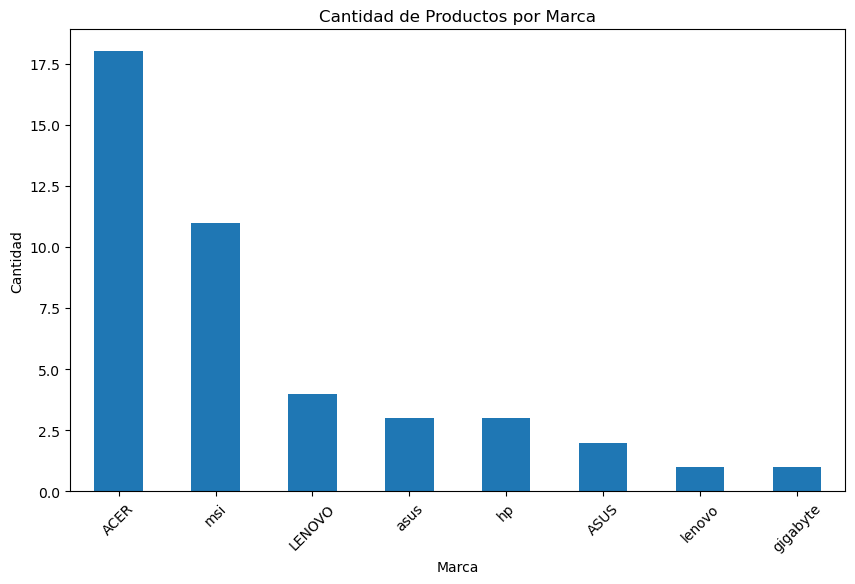

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
# Contar la cantidad de apariciones de cada marca
marca_counts = df_final['MARCA'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
marca_counts.plot(kind='bar')
plt.title('Cantidad de Productos por Marca')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

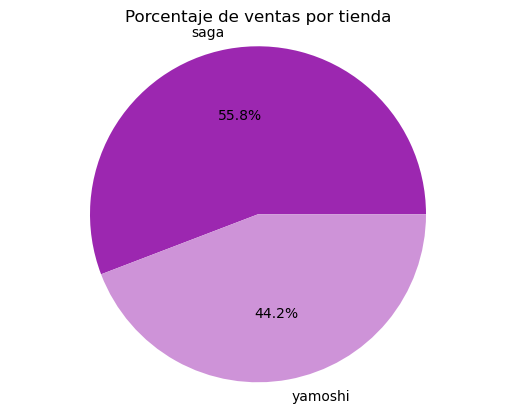

In [98]:
import matplotlib.pyplot as plt

# Calcular los porcentajes de cada tienda
porcentajes = df_final['TIENDA'].value_counts(normalize=True) * 100

# Configurar los colores
colores = ['#9C27B0', '#CE93D8', '#E1BEE7', '#F3E5F5']

# Crear el gráfico circular
plt.pie(porcentajes, labels=porcentajes.index, colors=colores, autopct='%1.1f%%')

# Ajustar el aspecto del gráfico
plt.axis('equal')
plt.title('Porcentaje de ventas por tienda')

# Mostrar el gráfico
plt.show()

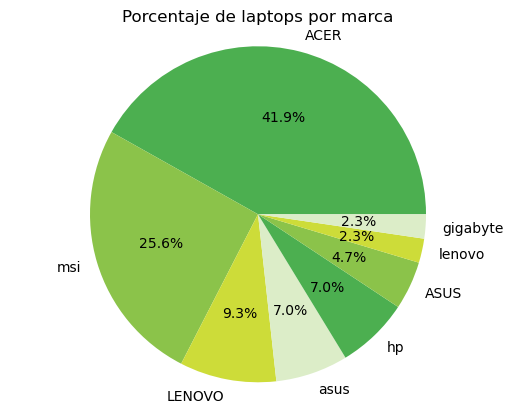

In [99]:
# Calcular los porcentajes de cada marca
porcentajes = df_final['MARCA'].value_counts(normalize=True) * 100

# Configurar los colores
colores = ['#4CAF50', '#8BC34A', '#CDDC39', '#DCEDC8']

# Crear el gráfico circular
plt.pie(porcentajes, labels=porcentajes.index, colors=colores, autopct='%1.1f%%')

# Ajustar el aspecto del gráfico
plt.axis('equal')
plt.title('Porcentaje de laptops por marca')

# Mostrar el gráfico
plt.show()
